# Qunatum optimal control example

This is an example code for qunatum optimal control. you can choose any Hamiltonian you want but with only one control parameter. 

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from qoct_gen import QH, QOCT
%matplotlib inline

Start with some initial conditions of Hamiltonian matrix and an initial control parameter.

In [71]:
#H0 = np.array([[1.,0.],[0.,-1.]])
H0 = np.array([[0.,0.],[0.,0.]])
Hx = np.array([[0,1.],[1.,0]])
Hy = np.array([[0,-1j],[1j,0]])
a0 = .9
N = 200
ctrl_1 = a0*np.ones(N)
ctrl_2 = np.sqrt(1-a0**2)*np.ones(N)
phi_i = [[0],[1.]]
#print ctrl_1[999:]
Hr11 = -Hx
Hr12 = Hy
Hr21 = np.sqrt(3)*Hx
Hr22 = -np.sqrt(3)*Hy
He1 = Hx
He2 = -Hy

H = [Hr11, Hr12, Hr21, Hr22, He1, He2]
ctrl = [ctrl_1*ctrl_1, ctrl_1*ctrl_2, ctrl_2*ctrl_1, ctrl_2*ctrl_2, ctrl_1, ctrl_2]

Call QH module to build up equation of motion and states.

In [72]:
qh_test = QH(H0, H, ctrl, phi_i)
time = qh_test.real_tim
phi = qh_test.phi_t()

Here we can show our first figure of probability variation in time.

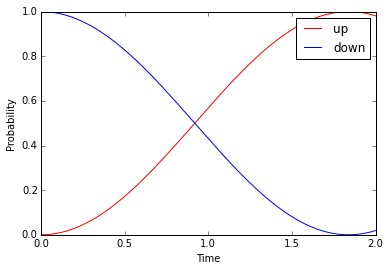

In [73]:
prob = qh_test.prob_t(phi)
plt.plot(time, prob[:,0,:],'r',label = 'up')
plt.plot(time, prob[:,1,:],'b',label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

You can find the probability will stay at original state since I choose eigenstate to begin, and with a small variation cause by ctrl_i. 

Given the goal state we want and previous qh_test class into QOCT module to calculate optimal control pulse.

In [74]:
phi_g = [[1],[0]]
qoct_test = QOCT(qh_test, phi_g)
ctrl_test = qoct_test.run()


IterTime: 1,   Error: 0.00966860181538,   TotTime: 0.444408,   AvgTime: 0.444412
IterTime: 2,   Error: 0.00400410876609,   TotTime: 0.835882,   AvgTime: 0.417943
IterTime: 3,   Error: 0.00173938888275,   TotTime: 1.250436,   AvgTime: 0.416813333333
IterTime: 4,   Error: 0.000808676711921,   TotTime: 1.657461,   AvgTime: 0.41436625
IterTime: 5,   Error: 0.00040613771835,   TotTime: 2.067851,   AvgTime: 0.413571
IterTime: 6,   Error: 0.000219867238411,   TotTime: 2.475294,   AvgTime: 0.412549666667
IterTime: 7,   Error: 0.000126885813912,   TotTime: 2.878222,   AvgTime: 0.411175142857
IterTime: 8,   Error: 7.68707549105e-05,   TotTime: 3.282865,   AvgTime: 0.410358625


10.0552678543 9.69755380027


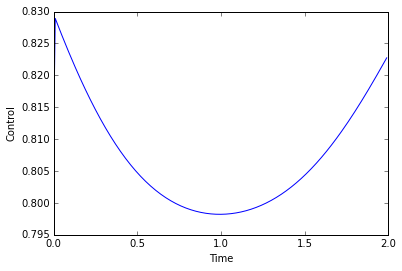

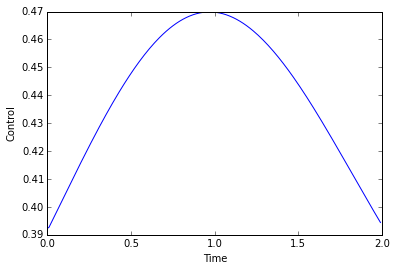

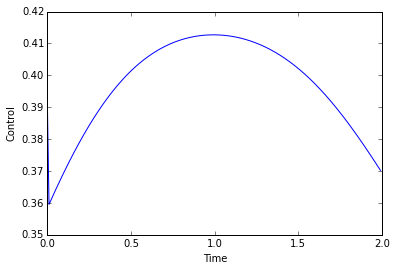

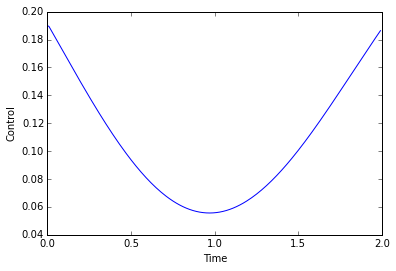

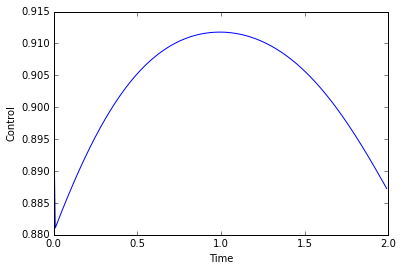

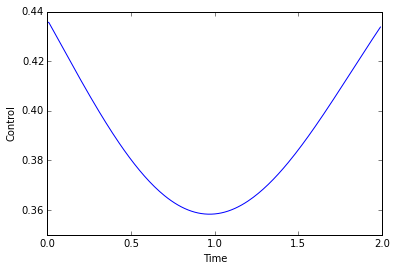

In [75]:
print np.sum(ctrl_test[:4,:10]**2), np.sum(ctrl_test[4:,:10]**2)

for i in range(len(ctrl_test[:,0])):
    plt.plot(time[:-1], ctrl_test[i,:])
    plt.xlabel('Time')
    plt.ylabel('Control')
    plt.show()


and probability variation in time.

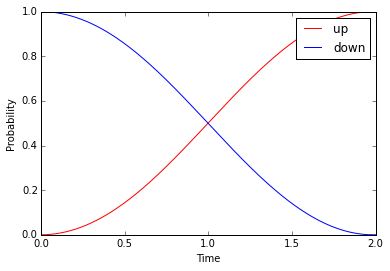

In [76]:
phi_new = qh_test.phi_t()
prob_new = qh_test.prob_t(phi_new)

plt.plot(time, prob_new[:,0,:],'r',label = 'up')
plt.plot(time, prob_new[:,1,:],'b', label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

Following we consider a long time variation of probability and control comes in the middle time.

In [77]:
lon = np.shape(ctrl_test)[1]
num_c = np.shape(ctrl_test)[0]
ctrl_lon = np.zeros((num_c,3*lon))
ctrl_lon[:,lon:2*lon] = ctrl_test[:,:]

One can plot the probability variation again.

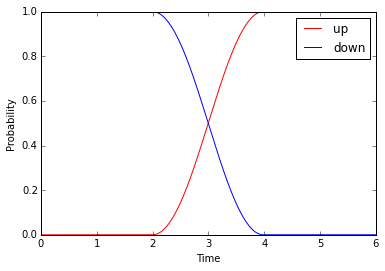

In [78]:
qh_test2 = QH(H0, H, [ctrl_lon[0],ctrl_lon[1],ctrl_lon[2],ctrl_lon[3],ctrl_lon[4],ctrl_lon[5]], phi_i)
time2 = qh_test2.real_tim
phi2 = qh_test2.phi_t()

prob2 = qh_test2.prob_t(phi2)
plt.plot(time2, prob2[:,0,:],'r',label = 'up')
plt.plot(time2, prob2[:,1,:],'b', label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

The end.